In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error, explained_variance_score

warnings.filterwarnings('ignore')


#### Hipotesis

Se plantea la hipótesis de que el precio de los autos en venta estará relacionado con múltiples factores. 
El año de fabricación será un determinante, donde se espera que los vehículos más recientes tengan precios más altos debido a su valor percibido. 
El estado del vehículo será importante en la fijación de precios, ya que los autos en mejores condiciones tendrán un mayor valor de mercado.
La marca también influirá en el precio promedio, ya que algunas marcas premium tienden a tener precios más altos. 
El tipo de transmisión y el sistema de combustión también pueden tener un impacto en los precios, ya que los vehículos con transmisiones automáticas y sistemas de combustión eficientes pueden ser más demandados. 
Por último, la relación entre el precio y los kilómetros recorridos permitirá evaluar la depreciación y la demanda en el uso del vehículo. 
Se espera que esta investigación proporcione una comprensión más completa de los factores que afectan los precios de los autos en venta y ayude a los compradores y vendedores a tomar decisiones informadas.

En este apartado, se filtraron por las columnas las cuales se consideran mas importantes. Se reemplazan los datos nulos con un guion en el caso que existiese alguno ya que dichas columnas no deberian tener datos faltantes. Se eliminan duplicados y se reemplazan todas las letras en minusculas en el apartado de la columna make(las marcas de automoviles). De esta forma los datos estaran en estado optimo para trabajar sobre sus precios utilizando la columna "price".

In [2]:
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'

datos = pd.read_excel(ruta_archivo)
print(datos)  # Imprimir el dataset completo

print(datos.head())
print("Numero de filas:", len(datos))
print("Numero de columnas:", len(datos.columns))

# Creamos una lista de tipos de datos
tipos_datos = datos.dtypes
print(tipos_datos)

datos = datos.fillna("-")

# Obtener el numero de filas y columnas
num_filas = datos.shape[0]
num_columnas = datos.shape[1]

print("Numero de filas:", num_filas)
print("Numero de columnas:", num_columnas)

     location  condition Listed_date Listed_time drive      fuel        lat   
0      dallas        NaN  2022-05-30       20;12   4wd      gas   45.547200  \
1      dallas  excellent  2022-05-29       09;22   4wd       gas  38.614952   
2      dallas  excellent  2022-05-30       13;45   NaN   diesel   32.499398   
3      dallas        NaN  2022-05-28       14;46   NaN  electric  32.944193   
4      dallas        new  2022-05-29       14;06   4wd  electric  32.475700   
...       ...        ...         ...         ...   ...       ...        ...   
2599   dallas  excellent  2022-05-31       11;05   rwd       gas  32.262967   
2600   dallas  excellent  2022-05-30       15;36   rwd       gas  33.197600   
2601   dallas  excellent  2022-06-01       08;47   4wd    diesel  33.072044   
2602   dallas  excellent  2022-06-01       08;46   4wd    diesel  33.072044   
2603   dallas  excellent  2022-06-01       08;45   4wd    diesel  33.072044   

            long  odometer paint color  ...       s

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   location         2604 non-null   object        
 1   condition        2604 non-null   object        
 2   Listed_date      2604 non-null   datetime64[ns]
 3   Listed_time      2604 non-null   object        
 4   drive            2604 non-null   object        
 5   fuel             2604 non-null   object        
 6   lat              2604 non-null   object        
 7   long             2604 non-null   object        
 8   odometer         2604 non-null   object        
 9   paint color      2604 non-null   object        
 10  price            2604 non-null   object        
 11  size             2604 non-null   object        
 12  title status     2604 non-null   object        
 13  transmission     2604 non-null   object        
 14  type             2604 non-null   object 

In [4]:
datos.head(7)

,location,condition,Listed_date,Listed_time,drive,fuel,lat,long,odometer,paint color,...,size,title status,transmission,type,year make model,cylinders,year,make,re_model,MODELS
0,dallas,-,2022-05-30,20;12,4wd,gas,45.5472,-122.5001,60.0,grey,...,-,clean,automatic,SUV,2021 Mercedes-Benz AMG G 63 FULLY CUSTOMIZED*...,8,2021,Mercedes-Benz,Mercedes-Benz AMG G 63 FULLY CUSTOMIZED* ONLY...,AMG G 63 FULLY CUSTOMIZED* ONLY G63 IN THE CO...
1,dallas,excellent,2022-05-29,09;22,4wd,gas,38.614952,-121.271667,34000.0,-,...,-,clean,automatic,SUV,2019 Mercedes-Benz AMG G 63 G63 *,8,2019,Mercedes-Benz,Mercedes-Benz AMG G 63 G63 *,AMG G 63 G63 *
2,dallas,excellent,2022-05-30,13;45,-,diesel,32.499398,-96.821823,300000.0,-,...,-,clean,automatic,-,2003 dodge ram 2500,-,2003,dodge,dodge ram 2500,ram 2500
3,dallas,-,2022-05-28,14;46,-,electric,32.944193,-96.741595,337.0,-,...,full-size,clean,automatic,sedan,2022 MERCEDES-BENZ EQS-CLASS,-,2022,MERCEDES-BENZ,MERCEDES-BENZ EQS-CLASS,EQS-CLASS
4,dallas,new,2022-05-29,14;06,4wd,electric,32.4757,-96.9936,100.0,red,...,-,clean,other,SUV,2022 tesla x,other,2022,tesla,tesla x,x
5,dallas,good,2022-06-01,13;30,rwd,gas,32.9628,-96.3648,57845.0,blue,...,-,clean,manual,coupe,1963 chevrolet corvette,8,1963,chevrolet,chevrolet corvette,corvette
6,dallas,-,2022-05-30,17;10,-,gas,32.4663,-97.4011,123456.0,-,...,-,missing,automatic,-,2020 Tesla Model x,-,2020,Tesla,Tesla Model x,Model x


¿Cual es el precio promedio de los automóviles?.

A la par creamos un archivo csv para poder visualizar los datos en caso de que se necesiten enviar sin la necesidad de correr el codigo, lo que nos permite una mayor facilidad en caso de requerir enviar informacion a quien lo necesite.

In [5]:
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'
datos = pd.read_excel(ruta_archivo)

# Calcular el precio promedio de los autos
average_price = datos["price"].mean()
# Eliminar valores nulos
datos = datos.dropna()
print("El precio promedio de un automóvil es:", average_price)

# Extraer los valores de la columna precio
numbers = datos["price"].values

# Verificar si hay valores no numéricos o faltantes
if np.any(np.isnan(numbers)):
    print("La columna 'price' contiene valores no numéricos o faltantes.")
else:
    # Calcular la media y la desviación estándar
    mean = np.mean(numbers)
    std = np.std(numbers)
    print("Media:", mean)
    print("Desviación estándar:", std)

# Exportar los datos a un archivo tipo "csv"
datos.to_csv("car_prices.csv", index=False)

El precio promedio de un automóvil es: 22561.376393694733
Media: 16134.579734219269
Desviación estándar: 15291.930615131454


¿Cual es el precio promedio por tipo de automóvil?

En este apartado nuevamente creamos la exportacion de datos a un archivo tipo .csv misma finalidad y manteniendo siempre el orden.

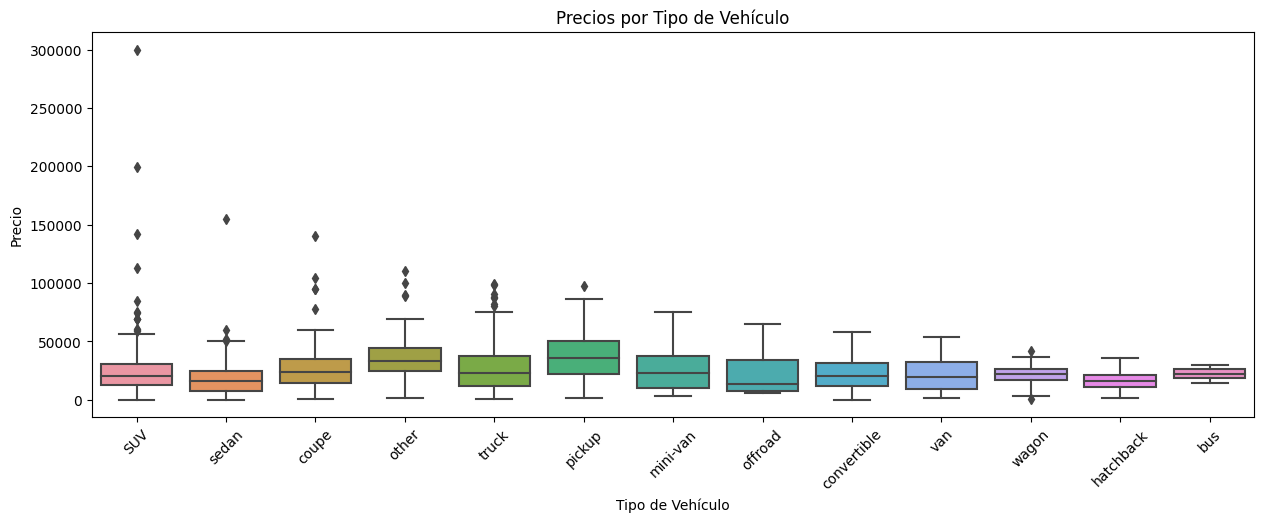

type
pickup         37134.648000
other          36103.364583
truck          27707.025000
coupe          27133.348624
mini-van       24780.020000
SUV            24371.014793
offroad        24030.500000
convertible    22345.045455
bus            22225.000000
van            21492.140000
wagon          21053.250000
sedan          17942.712727
hatchback      16180.152542
Name: price, dtype: float64


In [6]:
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'
datos = pd.read_excel(ruta_archivo)

# Filtrar y seleccionar columnas específicas
columnas_interesantes = ['price', 'type']
datos_filtrados = datos[columnas_interesantes]

# Eliminar filas con valores faltantes
datos_sin_nan = datos_filtrados.dropna()

# Eliminar duplicados
datos_sin_duplicados = datos_sin_nan.drop_duplicates()

# Realizar operaciones de agrupación y resumen
resumen_por_categoria = datos_sin_duplicados.groupby('type')['price'].mean()

# Ordenar de precio mayor a menor
resumen_por_categoria = resumen_por_categoria.sort_values(ascending=False)

# Exportar los resultados a un nuevo archivo
ruta_resultado = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\resultado.xlsx'
resumen_por_categoria.to_excel(ruta_resultado)

# Grafico tipo boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(x='type', y='price', data=datos_sin_duplicados)
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Precio')
plt.title('Precios por Tipo de Vehículo')
plt.xticks(rotation=45)
plt.show()
                     
print(resumen_por_categoria)

¿Cual es el precio promedio por marca de vehiculo?

Media de precios: 23741.206521739132
make
tesla        107362.750000
peterbilt     94892.500000
kenworth      88266.666667
bentley       79900.000000
freight       75000.000000
                 ...      
click          1250.000000
to              600.000000
harley           28.000000
kaiser            1.000000
z                 1.000000
Name: price, Length: 92, dtype: float64


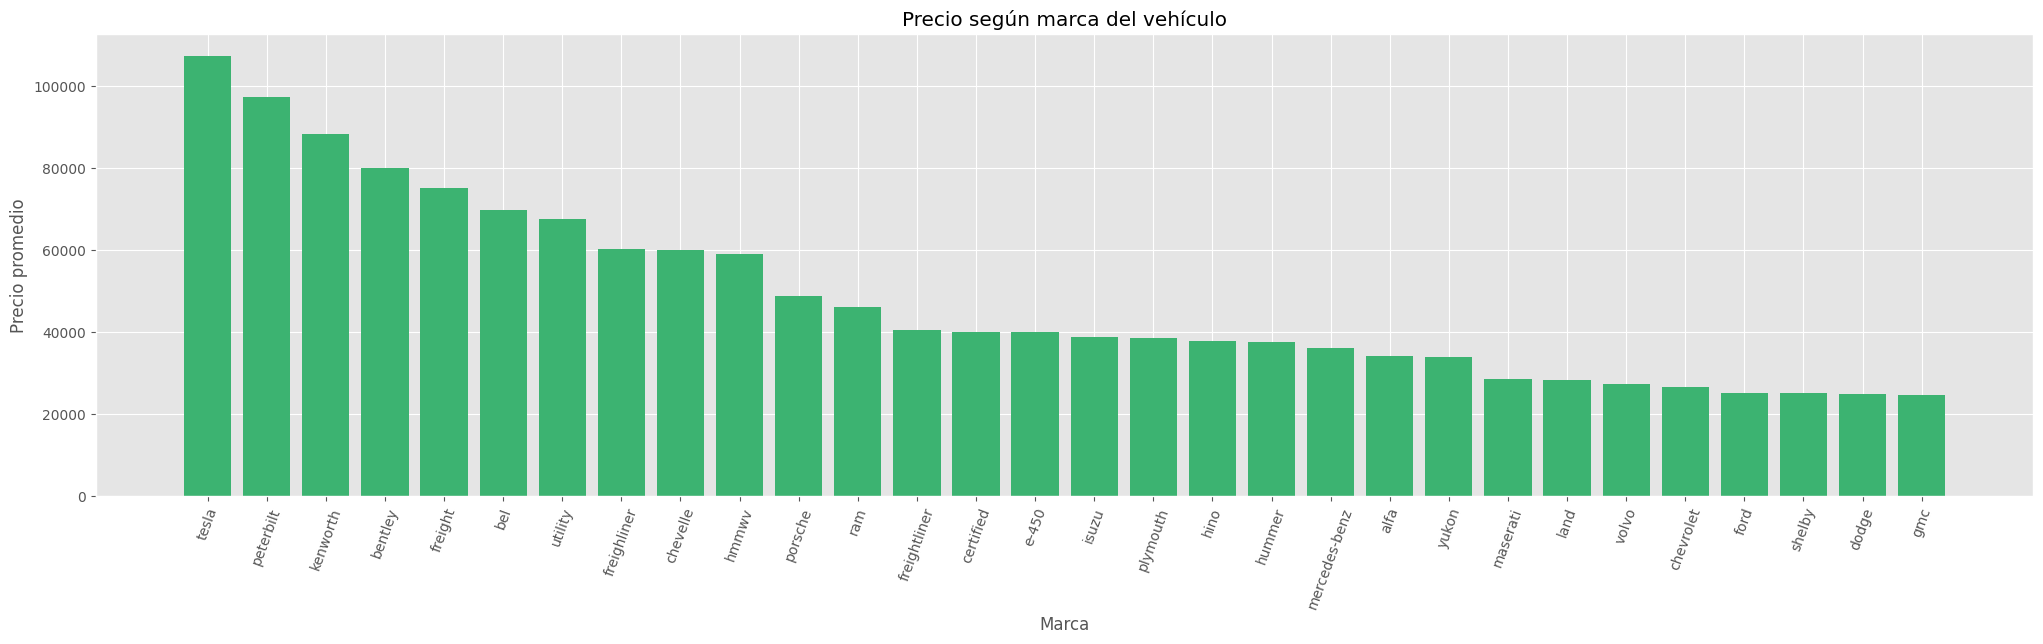

In [7]:
def preprocess_data(data):
    # Convertir 'make' a minúsculas para unificar las marcas sin importar el formato
    data['make'] = data['make'].str.lower()

    # Filtrar y seleccionar columnas específicas
    columnas_interesantes = ['make', 'price']
    data_filtrada = data[columnas_interesantes]

    # Eliminar filas con valores faltantes
    data_sin_nan = data_filtrada.dropna()

    # Eliminar duplicados
    data_sin_duplicados = data_sin_nan.drop_duplicates()

    return data_sin_duplicados

def main():
    ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'
    datos = pd.read_excel(ruta_archivo)

    try:
        datos_preprocesados = preprocess_data(datos)

        # Agrupar por 'make' y calcular la media de 'price'
        precio_por_marca = datos_preprocesados.groupby('make')['price'].mean()

        # Verificar si hay valores no numéricos o faltantes en 'price'
        numbers = datos_preprocesados['price']
        if np.any(np.isnan(numbers)):
            print("La columna 'price' contiene valores no numéricos o faltantes.")
        else:
            # Calcular la media y la desviación estándar
            mean = np.mean(numbers)
            print("Media de precios:", mean)

        # Order by higher price first
        precio_por_marca = precio_por_marca.sort_values(ascending=False)

        # Exportar los resultados a un nuevo archivo
        ruta_resultado1 = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\resultado1.xlsx'
        precio_por_marca.to_excel(ruta_resultado1)
        print(precio_por_marca)

        # Grafico de barras
        grouped_df = datos.groupby("make")["price"].mean().reset_index()
        grouped_df["make"] = grouped_df["make"].astype(str)
        grouped_df=grouped_df.sort_values('price', ascending=False).head(30)
        plt.figure(figsize=(25, 6))
        plt.style.use('ggplot')
        plt.bar(grouped_df["make"], grouped_df["price"], color='mediumseagreen')
        plt.ylabel("Precio promedio")
        plt.xlabel("Marca")
        plt.title("Precio según marca del vehículo")
        plt.xticks(rotation=70)
        plt.show()
    except Exception as e:
        print("Error:", e)

if __name__ == "__main__":
    main()

¿Cual es el precio promedio por año de fabricación?

Nuevamente exportamos nuestros datos obtenidos a un excel donde al abrirlo nos encontraremos con la informacion de los años y sus precios promedios.

Media de precios: 23566.914003759397
year
1932    49900.000000
1939    10900.000000
1949    59500.000000
1951    13000.000000
1953    11466.666667
            ...     
2019    39481.105263
2020    44602.540541
2021    56521.073171
2022    71067.290323
2023     1500.000000
Name: price, Length: 71, dtype: float64


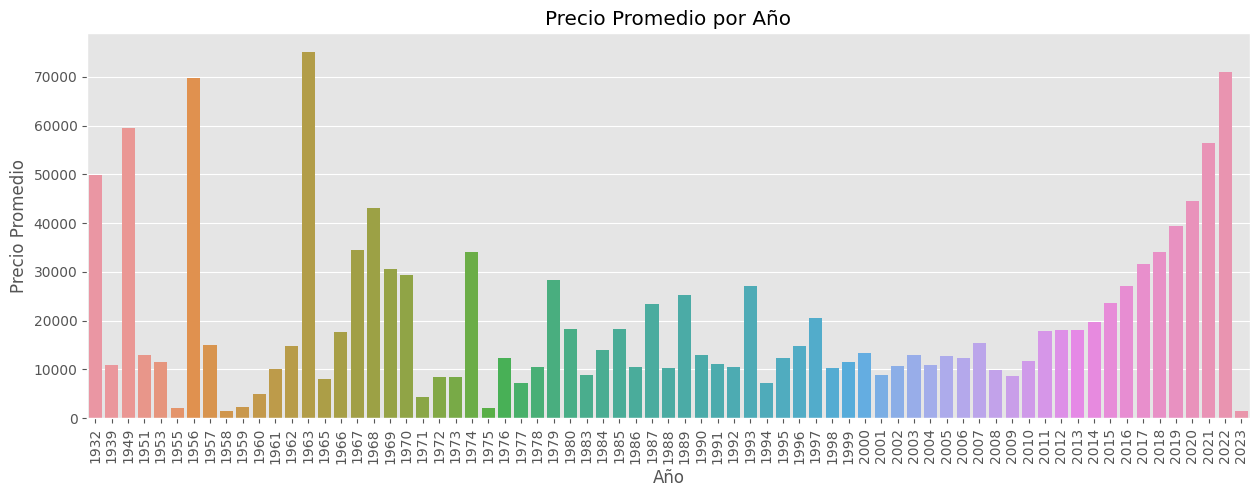

In [8]:
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'
datos = pd.read_excel(ruta_archivo)

# Filtrar y seleccionar columnas especificas
columnas_interesantes = ['year', 'price']
datos_filtrados = datos[columnas_interesantes]

# Eliminar filas con valores faltantes
datos_sin_nan = datos_filtrados.dropna()

# Eliminar duplicados
datos_sin_duplicados = datos_sin_nan.drop_duplicates()

# Agrupar por 'make' y calcular la media de 'price'
precio_por_marca = datos_sin_duplicados.groupby('year')['price'].mean()

# Verificar si hay valores no numericos o faltantes en 'price'
numbers = datos_sin_duplicados['price']
if np.any(np.isnan(numbers)):
    print("La columna 'price' contiene valores no numéricos o faltantes.")
else:
    # Calcular la media y la desviación estándar
    mean = np.mean(numbers)
    print("Media de precios:", mean)

# Exportar los resultados a un nuevo archivo
ruta_resultado2 = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\resultado2.xlsx'
precio_por_marca.to_excel(ruta_resultado2)
print(precio_por_marca)

# Crea un gráfico de barras de los valores ordenados
plt.figure(figsize=(15, 5))
sns.barplot(x=precio_por_marca.index, y=precio_por_marca.values)
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Año')
plt.xticks(rotation=90)
plt.show()


¿Cuál es el precio promedio de los vehículos por condición?

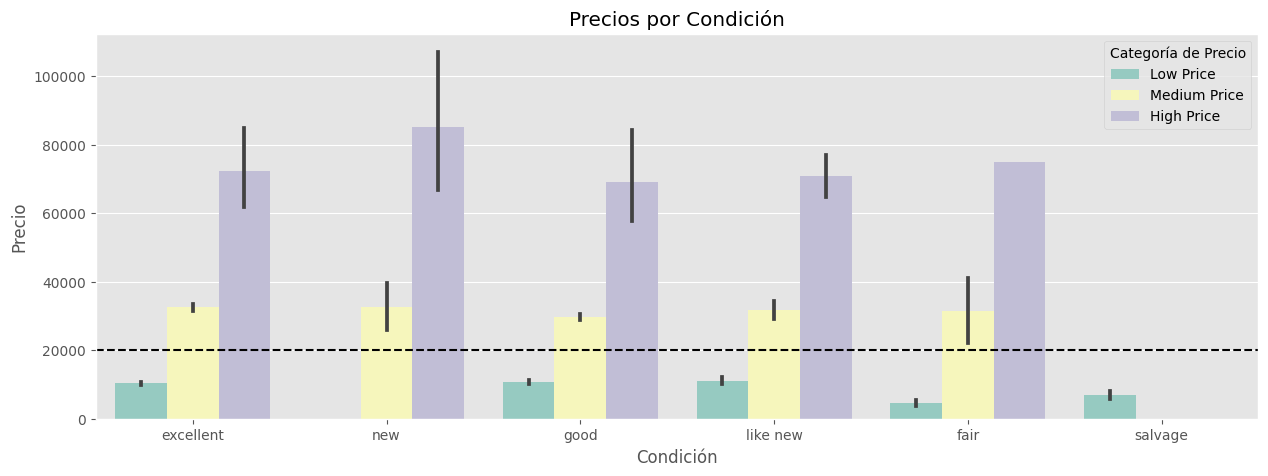

Valores para 'Low Price' category:
      condition    price
1182  excellent  20000.0
1183       good  20000.0
1185       good  20000.0
1186  excellent  20000.0
1187  excellent  20000.0
...         ...      ...
2596  excellent      7.0
2597       good      3.0
2598       fair      1.0
2599  excellent      1.0
2600  excellent      1.0

[1022 rows x 2 columns]

Valores para 'Medium Price' category:
      condition    price
182    like new  49999.0
183    like new  49999.0
189   excellent  49995.0
193   excellent  49900.0
194   excellent  49900.0
...         ...      ...
1164       good  20590.0
1165       good  20590.0
1166       good  20590.0
1167       good  20500.0
1170  excellent  20490.0

[536 rows x 2 columns]

Valores para 'High Price' category:
     condition     price
1    excellent  199000.0
2    excellent  160000.0
4          new  142000.0
5         good  140000.0
8    excellent  112990.0
..         ...       ...
176       good   50990.0
177   like new   50988.0
178   like new 

In [9]:
# Ruta del archivo
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'

# Cargar datos
datos = pd.read_excel(ruta_archivo)

# Filtrar y seleccionar columnas específicas
columnas_interesantes = ['condition', 'price']
datos_filtrados = datos[columnas_interesantes]

# Eliminar filas con valores faltantes
datos_sin_nan = datos_filtrados.dropna()

# Definir las categorías de precios
bins = [0, 20000, 49999, float('inf')]
labels = ['Low Price', 'Medium Price', 'High Price']

# Crear una nueva columna 'price_category' basada en los cortes definidos
datos_sin_nan['price_category'] = pd.cut(datos_sin_nan['price'], bins=bins, labels=labels)


# Crear un gráfico de barras apiladas
plt.figure(figsize=(15, 5))
sns.barplot(data=datos_sin_nan, x='condition', y='price', hue='price_category', palette='Set3')
plt.axhline(y=datos_sin_nan['price'].mean(), color='black', linestyle='--')
plt.title('Precios por Condición')
plt.xlabel('Condición')
plt.ylabel('Precio')
plt.legend(title='Categoría de Precio', loc='upper right')
plt.show()

# Filtrar los datos por cada categoría de precio
low_price_data = datos_sin_nan[datos_sin_nan['price_category'] == 'Low Price']
medium_price_data = datos_sin_nan[datos_sin_nan['price_category'] == 'Medium Price']
high_price_data = datos_sin_nan[datos_sin_nan['price_category'] == 'High Price']

# Imprimir los valores de 'condition' y 'price' para cada categoría de precio
print("Valores para 'Low Price' category:")
print(low_price_data[['condition', 'price']])

print("\nValores para 'Medium Price' category:")
print(medium_price_data[['condition', 'price']])

print("\nValores para 'High Price' category:")
print(high_price_data[['condition', 'price']])



¿Cuando un auto tiene mas kilometraje tiende a ser mas economico pero que influira su transmision?

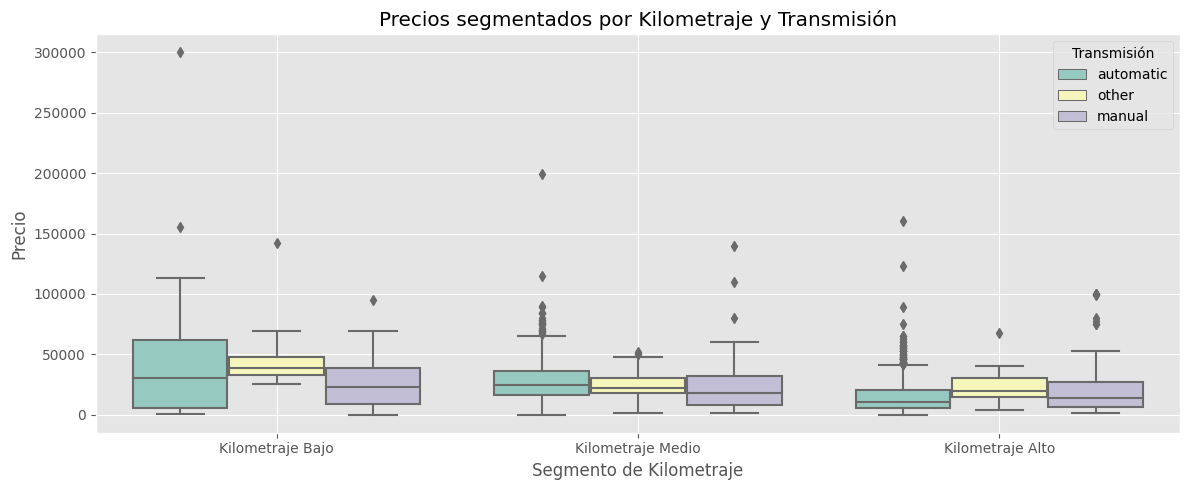

In [10]:
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'
datos = pd.read_excel(ruta_archivo)

limite_1 = datos['odometer'].min()
limite_2 = 10000
limite_3 = 100000
limite_4 = datos['odometer'].max()

etiquetas = ['Kilometraje Bajo', 'Kilometraje Medio', 'Kilometraje Alto']
datos['kilometraje'] = pd.cut(datos['odometer'], bins=[limite_1, limite_2, limite_3, limite_4], labels=etiquetas)

plt.figure(figsize=(12, 5))
plt.style.use('ggplot')
sns.boxplot(x='kilometraje', y='price', hue='transmission', data=datos, palette='Set3')
plt.title('Precios segmentados por Kilometraje y Transmisión')
plt.xlabel('Segmento de Kilometraje')
plt.ylabel('Precio')
plt.legend(title='Transmisión')
plt.grid(True)
plt.tight_layout()
plt.show()


¿Influira tambien su transmision en el precio ?

### AgglomerativeClustering

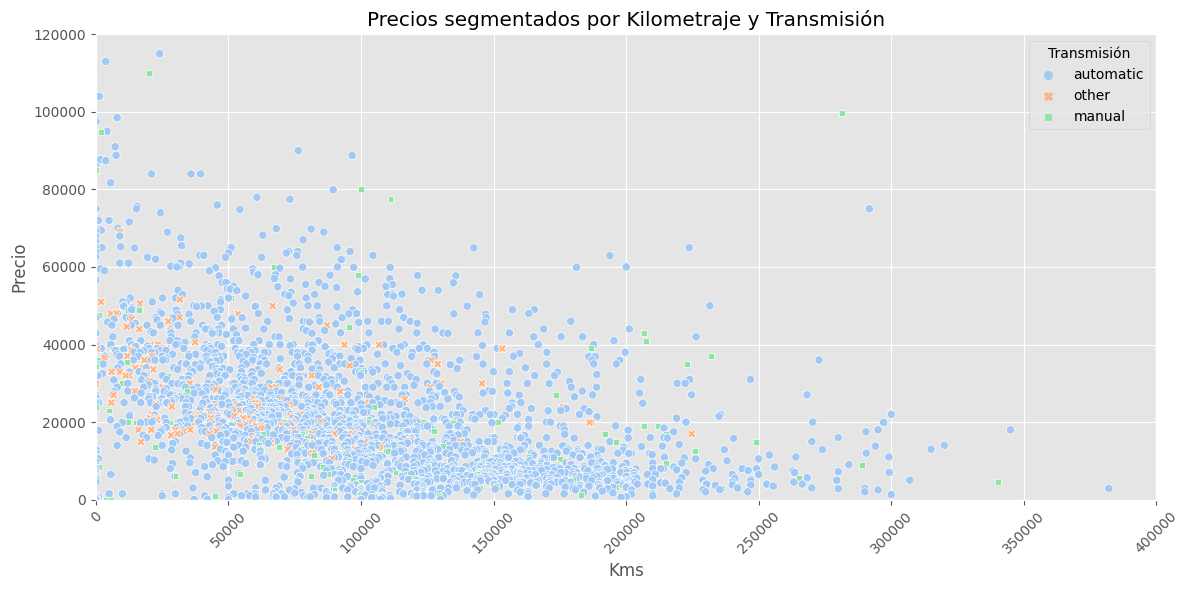

In [11]:

ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'
datos = pd.read_excel(ruta_archivo)

imputer = SimpleImputer(strategy='median')
datos[['odometer', 'price']] = imputer.fit_transform(datos[['odometer', 'price']])

X = datos[['odometer', 'price']]
agglomerative_model = AgglomerativeClustering(n_clusters=4)
agglomerative_model.fit(X)
datos['cluster_label'] = agglomerative_model.labels_

plt.figure(figsize=(12, 6))
plt.style.use('ggplot')
sns.scatterplot(x='odometer', y='price', hue='transmission', style='transmission', data=datos, palette='pastel', markers=True)
plt.title('Precios segmentados por Kilometraje y Transmisión')
plt.xlabel('Kms')
plt.xlim(0.0, 400000)
plt.ylabel('Precio')
plt.ylim(0.0, 120000)
plt.legend(title='Transmisión', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

### Concluciones

El análisis sobre el mercado de vehículos usados de Dallas reveló que la antigüedad del automóvil está inversamente relacionada con su precio, mostrando una tendencia a que los vehículos más antiguos tiendan a tener precios más bajos. Además, la condición del vehículo y el kilometraje también influyen significativamente en el precio, ya que los autos en mejores condiciones y con menor kilometraje tienden a tener precios más altos. Se observa una gran dominancia de automoviles de transmision automatica sobre la manual, pero no necesariamente esta dominancia causa una baja abrupta de los precios, entonces podriamos deducir que al menos en Dallas la gente no busca automoviles dependiendo de si es maunal o automatico.La aplicación de modelos de regresión lineal y polinomial permitió predecir precios, demostrando que el modelo polinomial tuvo una mejor precisión al ajustarse a los datos. No obstante, para una comprensión más profunda del mercado, se necesitaría un análisis más exhaustivo considerando mas variables o agrupando las mismas de diversas formas de modo tal que nos permita un modelo mas eficiente.

Seleccionamos los datos a trabajar con machine learning.

In [12]:
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'
datos = pd.read_excel(ruta_archivo)

columnas_seleccionadas = ['location', 'condition', 'drive', 'fuel', 'odometer', 'price', 'title status',
                          'transmission', 'type', 'year make model', 'year', 'make', 're_model', 'MODELS']

datos_seleccionados = datos[columnas_seleccionadas]

print(datos_seleccionados.describe())
print(datos_seleccionados.info())

           odometer          price         year
count  2.596000e+03    2601.000000  2604.000000
mean   1.068846e+05   22561.376394  2010.856375
std    1.135645e+05   19356.100193    10.087635
min    1.000000e+00       1.000000  1932.000000
25%    5.301425e+04    8500.000000  2008.000000
50%    9.200000e+04   18950.000000  2014.000000
75%    1.401238e+05   30995.000000  2017.000000
max    3.333333e+06  299997.000000  2023.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         2604 non-null   object 
 1   condition        1635 non-null   object 
 2   drive            1876 non-null   object 
 3   fuel             2603 non-null   object 
 4   odometer         2596 non-null   float64
 5   price            2601 non-null   float64
 6   title status     2604 non-null   object 
 7   transmission     2602 non-null   object 
 

Utilizamos un modelo en el cual el 80% sera de entrenamiento y el 20% restante de testeo

In [13]:
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'
datos = pd.read_excel(ruta_archivo)

train, test = train_test_split(datos, test_size=0.2)
len(datos), len(train), len(test)


(2604, 2083, 521)

1. ¿Cómo comparar las predicciones de un modelo lineal y polinomial para predecir el precio de vehículos según su año?

Precisión del modelo polinomial: 0.4345575721251568
Precisión del modelo lineal: 0.14135523137740158


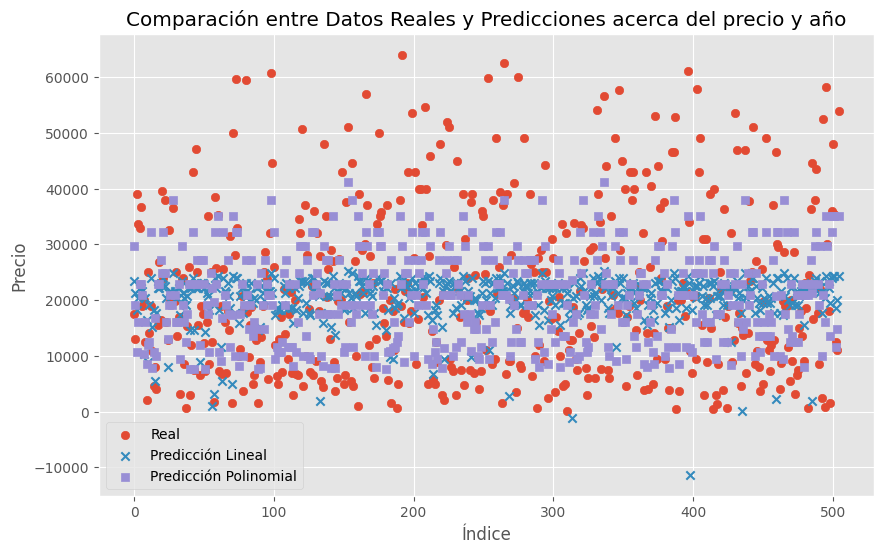

In [29]:
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'
datos = pd.read_excel(ruta_archivo)

imputer = SimpleImputer(strategy='median')
datos['price'] = imputer.fit_transform(datos['price'].values.reshape(-1, 1)).ravel()

Q1 = datos['price'].quantile(0.25)
Q3 = datos['price'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
datos = datos[(datos['price'] >= limite_inferior) & (datos['price'] <= limite_superior)]

X = datos[['year']]
y = datos['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

poly_features = PolynomialFeatures(degree=15)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

modelo_polynomial = LinearRegression()
modelo_polynomial.fit(X_train_poly, y_train)
y_pred_lineal = modelo_lineal.predict(X_test)
y_pred_polynomial = modelo_polynomial.predict(X_test_poly)
precision = modelo_polynomial.score(X_test_poly, y_test)
print('Precisión del modelo polinomial:', precision)
precision = modelo_lineal.score(X_test, y_test)
print('Precisión del modelo lineal:', precision)

df_comparacion = pd.DataFrame({'Real': y_test, 'Predicción Lineal': y_pred_lineal, 
                               'Predicción Polinomial': y_pred_polynomial})

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Real', marker='o')
plt.scatter(range(len(y_test)), y_pred_lineal, label='Predicción Lineal', marker='x')
plt.scatter(range(len(y_test)), y_pred_polynomial, label='Predicción Polinomial', marker='s')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.title('Comparación entre Datos Reales y Predicciones acerca del precio y año')
plt.legend()
plt.show()

El siguiente código realiza un análisis de regresión lineal y polinomial para predecir el precio de vehículos basándose en el año. Después de leer los datos y realizar un preprocesamiento que incluye llenar valores faltantes, se separa el conjunto de datos en variables, objetivo y características. Además, se elimina cualquier valor atípico de la columna 'price'(precio) mediante el uso del rango intercuartílico (IQR). A continuación, se utilizan un modelo de regresión lineal y un modelo de regresión polinomial de grado 15 para entrenar y predecir los precios de los vehículos en función de los años. Se calcula la precisión del modelo de regresión polinomial en el conjunto de prueba y, finalmente, se visualizan las comparaciones entre los datos reales y las predicciones de ambos modelos en un gráfico de dispersión.

Se utilizan tanto regresión lineal y polinomial debido a que las mismas se diferencian en la forma en que ajustan las relaciones entre variables: la regresión lineal se ajusta a datos lineales, mientras que la regresión polinomial se adapta a relaciones más complejas y no lineales mediante el uso de curvas polinomiales. Al ser un modelo muy basico no logra adaptarse al dato y retorna valores negativos para el precio del vehiculo.

¿Cómo se comparan los modelos de regresión lineal y polinomial para predecir el precio de vehículos?

### LinearRegression

Precisión del modelo: 0.38564333858419775


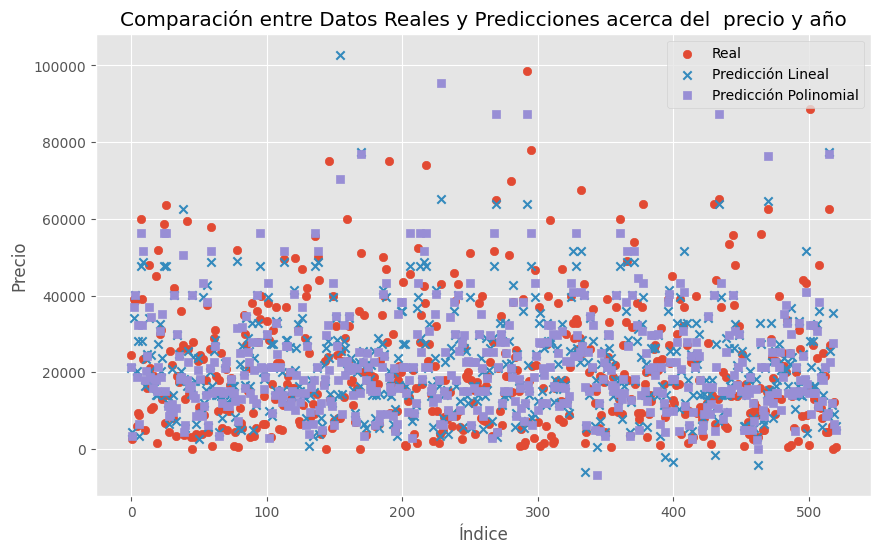

In [15]:
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'
datos = pd.read_excel(ruta_archivo)
datos = datos.fillna("0")

X = datos[['title status', 'drive','year']]
y = datos['price']
label_encoder = OneHotEncoder()
X = label_encoder.fit_transform(X)

imputer = SimpleImputer(strategy='median')
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

modelo_polynomial = LinearRegression()
modelo_polynomial.fit(X_train_poly, y_train)
precision = modelo_polynomial.score(X_test_poly, y_test)
print('Precisión del modelo:', precision)

y_pred_lineal = modelo_lineal.predict(X_test)
y_pred_polynomial = modelo_polynomial.predict(X_test_poly)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Real', marker='o')
plt.scatter(range(len(y_test)), y_pred_lineal, label='Predicción Lineal', marker='x')
plt.scatter(range(len(y_test)), y_pred_polynomial, label='Predicción Polinomial', marker='s')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.title('Comparación entre Datos Reales y Predicciones acerca del  precio y año')
plt.legend()
plt.show()

El código realiza un análisis de regresión lineal y polinomial (de grado 3) para predecir el precio de vehículos basado en características como el estado, el título, el tipo de tracción y año del vehículo. Después de leer y preprocesar los datos, se dividen en conjuntos de entrenamiento y prueba. Se entrenan dos modelos y se evalúa la precisión del modelo de regresión polinomial en el conjunto de prueba. Finalmente, se realizan predicciones y se visualiza la comparación entre los datos reales y las predicciones en un gráfico de dispersión. En esta ocacion al agregar un mayor numeros de variables aumenta la precision del modelo, de esta forma vemo que ya no arroja precios negativos.

9. ¿Cómo predecir el precio de vehículos utilizando un modelo de regresión lineal?

Precisión del modelo de regresión lineal: 0.217375504678883


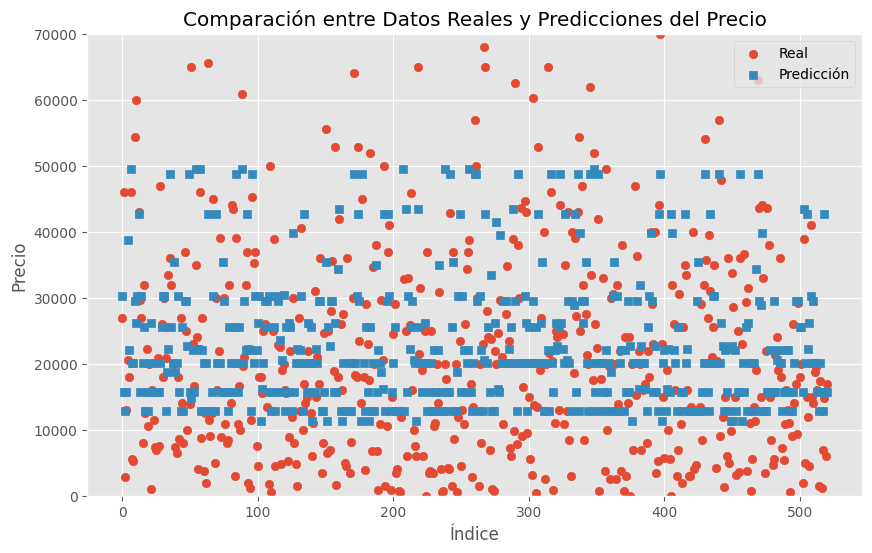

In [16]:

ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'
datos = pd.read_excel(ruta_archivo)
datos = datos.fillna("0")

X = datos[['type', 'fuel']]
y = datos['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['type', 'fuel'])])

modelo_regresion = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regression', LinearRegression())])

modelo_regresion.fit(X_train, y_train)
y_pred = modelo_regresion.predict(X_test)

precision = modelo_regresion.score(X_test, y_test)
print('Precisión del modelo de regresión lineal:', precision)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Real', marker='o')
plt.scatter(range(len(y_test)), y_pred, label='Predicción', marker='s')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.title('Comparación entre Datos Reales y Predicciones del Precio')
plt.legend()
plt.ylim(0, 70000)
plt.show()

En este caso final observamos como la inclusión de variables no concluyentes afecta de forma negativa la eficiencia del modelo creado. Es importante seleccionar de forma cuidadosa las características relevantes de modo tal que la calidad del modelo de predicción se mejore y optimice en su rendimiento y no disminuya su precisión.

10. ¿Hay alguna relación entre la transmisión de un vehículo y sus otras características?

El diagrama de dispersión de pares ayudara a mostrar cómo se distribuyen los datos para cada para variable.
Se muestran diferencias entre los vehículos con transmisión automática y manual. 
Por ejemplo, los vehículos con transmisión automática tienden a tener un precio de venta más alto, un kilometraje más bajo y un aumento de su producción desde los 1980 en adelante.

¿Hay alguna relación entre la transmisión de un vehículo y sus otras características?

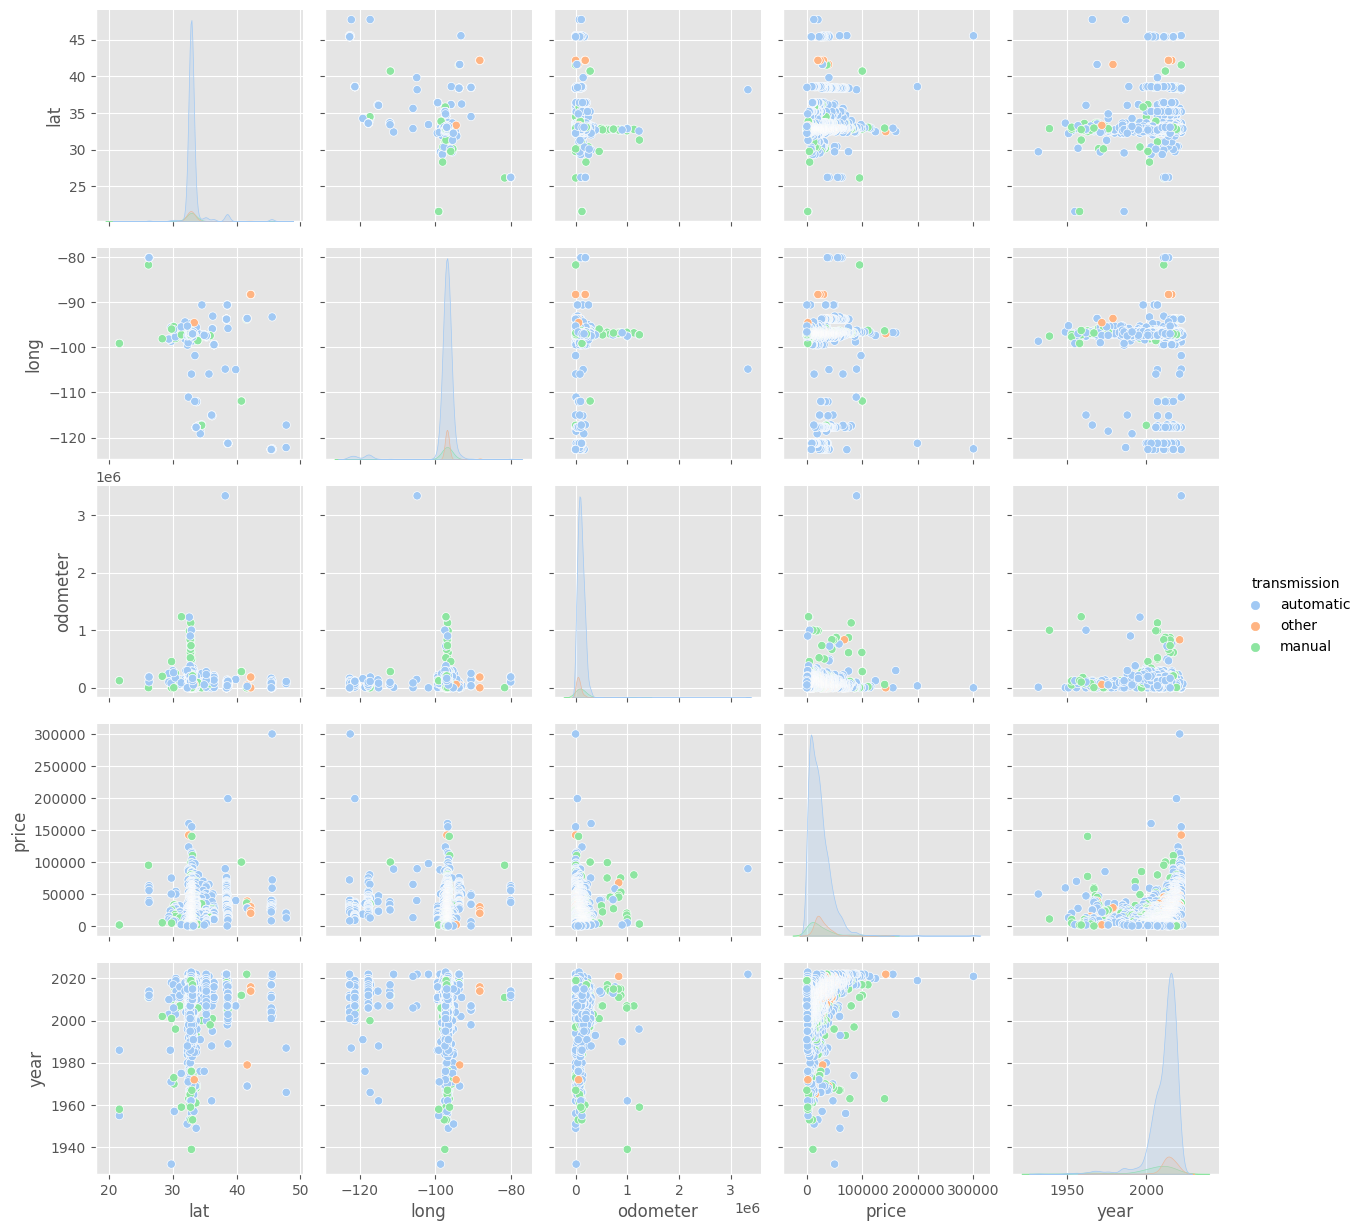

In [30]:
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'
datos = pd.read_excel(ruta_archivo)

sns.pairplot(data= datos, hue='transmission', palette='pastel')
plt.show()

Variables mas importantes a tener en cuenta para la efectividad del modelo

In [18]:
# Cargar los datos desde el archivo Excel
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission.xlsx'
datos = pd.read_excel(ruta_archivo)

# Define las columnas de interés
columnas_seleccionadas = ['location', 'condition', 'drive', 'fuel', 'odometer', 'price', 'title status',
                          'transmission', 'type', 'year make model', 'year', 'make', 're_model', 'MODELS']

datos_seleccionados = datos[columnas_seleccionadas]

# Codifica las columnas categóricas usando one-hot encoding
datos_codificados = pd.get_dummies(datos_seleccionados, columns=['location', 'condition', 'drive', 'fuel', 'title status',
                                                               'transmission', 'type', 'year make model', 'year', 'make', 're_model', 'MODELS'])

# Calcula la matriz de correlación con respecto a 'price'
correlation_with_price = datos_codificados.corr()['price'].sort_values(ascending=False)

# Obtén las primeras 4 características más importantes
top_features = correlation_with_price.head(4)

# Imprime las características más importantes
print("Las 4 características más importantes con respecto a 'price':")
print(top_features)

Las 4 características más importantes con respecto a 'price':
price          1.000000
drive_4wd      0.352916
fuel_other     0.301114
type_pickup    0.297331
Name: price, dtype: float64


# Modelos De Machine Learning

## GradientBoostingRegressor

Se utiliza un modelo de GradientBoostingRegressor para predecir los precios de los vehículos y asi realizar la validacion cruzada (K-fold cross-validation) con 5 splits utilizando la función cross_val_score para evaluar el rendimiento del modelo.
Luego, implementamos una división de los datos en conjuntos de entrenamiento y prueba y evalúa el modelo en el conjunto de prueba, calculando el RMSE, R2, MAE y MAPE.
Finalmente, muestra una gráfica de comparación entre los valores reales y predichos.

In [19]:
# Cargar los datos desde el archivo Excel
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission2.xlsx'
datos = pd.read_excel(ruta_archivo)

# Especificar el tamaño de la muestra
tamano_muestra = 100  # Puedes ajustar este valor

# Cargar una muestra aleatoria de los datos
datos = datos.sample(n=tamano_muestra, random_state=42)  # Eliminamos la línea de carga de muestra aleatoria

# Definir una función para asignar categoría de precio
def asignar_categoria_precio(price):
    if price < 10000:
        return 'Bajo'
    elif 10000 <= price < 20000:
        return 'Medio'
    else:
        return 'Alto'

# Seleccionar las columnas relevantes
columnas_seleccionadas = ['odometer', 'price', 'year', 'make', 'MODELS']

datos_seleccionados = datos[columnas_seleccionadas]

# Identificar y eliminar datos atípicos en la columna 'price'
Q1 = datos_seleccionados['price'].quantile(0.25)
Q3 = datos_seleccionados['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar datos atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar filas sin valores atípicos en 'price'
datos_sin_atípicos = datos_seleccionados[(datos_seleccionados['price'] >= lower_bound) & (datos_seleccionados['price'] <= upper_bound)]

# Agregar la columna 'categoria_precio' al DataFrame
datos_sin_atípicos['categoria_precio'] = datos_sin_atípicos['price'].apply(asignar_categoria_precio)

# Convertir la columna 'price' a tipo numérico
datos_sin_atípicos['price'] = pd.to_numeric(datos_sin_atípicos['price'])

# Creación de variables sintéticas
datos_sin_atípicos['edad_vehiculo'] = 2023 - datos_sin_atípicos['year'].astype(int)

# Codificación de características categóricas
cat_cols = ['make', 'MODELS', 'categoria_precio']

# Convertir todas las columnas categóricas a tipo string
for col in cat_cols:
    datos_sin_atípicos[col] = datos_sin_atípicos[col].astype(str)

# Aplicar OneHotEncoding a las características categóricas
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(datos_sin_atípicos[cat_cols])

# Obtener los nombres de las columnas después de la codificación
encoded_cat_col_names = encoder.get_feature_names_out(input_features=cat_cols)

# Crear un DataFrame con las características categóricas codificadas y sus nombres
encoded_cat_cols = pd.DataFrame(encoded_data, columns=encoded_cat_col_names)

# Eliminar las columnas originales que se codificaron
datos_sin_atípicos = datos_sin_atípicos.drop(cat_cols, axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = datos_sin_atípicos.drop(columns=['price'])
y = datos_sin_atípicos['price']

# Cambiar el modelo a Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Validación cruzada para evaluar el rendimiento del modelo
kf = KFold(n_splits=5, shuffle=True, random_state=42)  
results = cross_val_score(model, X, y, cv=kf)

rmse_scores = []
for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train_kf, y_train_kf)
    y_pred_kf = model.predict(X_test_kf)
    
    rmse_kf = np.sqrt(mean_squared_error(y_test_kf, y_pred_kf))
    rmse_scores.append(rmse_kf)

print("RMSE promedio en validación cruzada:", np.mean(rmse_scores))

# Continuar con la evaluación en el conjunto completo de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE en el conjunto de prueba:", rmse)

# Calcular R2
r2 = r2_score(y_test, y_pred)
print('R2 en el conjunto de prueba con Gradient Boosting:', r2)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)
print('MAE en el conjunto de prueba con Gradient Boosting: %.3f' % mae)

# Calcular MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE en el conjunto de prueba con Gradient Boosting: %.3f' % mape)

RMSE promedio en validación cruzada: 10333.191056808502
RMSE en el conjunto de prueba: 9342.681973975878
R2 en el conjunto de prueba con Gradient Boosting: 0.45498768677759127
MAE en el conjunto de prueba con Gradient Boosting: 7460.458
MAPE en el conjunto de prueba con Gradient Boosting: 2.892


Al observar las metricas que no son muy precisas decidimos cambiar el modelo de Machine Learning con la intencion de poder mejorar nuestro algoritmo y trabajo de forma efectiva en sus resultados.

### RandomForestRegressor
(Modelo seleccionado a desarrollar)

Aplicamos una función para categorizar los precios y eliminamos valores atípicos. Preparamos los datos, dividimos en conjuntos de entrenamiento y prueba, y codificamos variables categóricas. Escalamos las características y construimos un modelo de regresión de bosque aleatorio. 

- **RMSE (Error Cuadrático Medio):** Mide la precisión de las predicciones en la misma unidad que los datos. Cuanto menor, mejor.
- **R2 (Coeficiente de Determinación):** Indica qué proporción de la variación en los datos es explicada por el modelo. Cercano a 1 es mejor.
- **MAE (Error Absoluto Medio):** Mide el error promedio de las predicciones en la misma unidad que los datos.
- **MAPE (Error Porcentual Absoluto Medio):** Expresa el error promedio como un porcentaje del valor real. Cuanto menor, mejor.

Estas métricas se utilizan para evaluar qué tan bien un modelo de regresión se ajusta a los datos y para comparar diferentes modelos en función de su rendimiento en la tarea de predicción.

In [20]:
# Cargar los datos desde el archivo Excel
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission2.xlsx'
datos = pd.read_excel(ruta_archivo)

# Definir una función para asignar categoría de precio
def asignar_categoria_precio(price):
    if price < 10000:
        return 'Bajo'
    elif 10000 <= price < 20000:
        return 'Medio'
    else:
        return 'Alto'

# Seleccionar las columnas relevantes
columnas_seleccionadas = ['odometer', 'price', 'year', 'make']

datos_seleccionados = datos[columnas_seleccionadas]

# Identificar y eliminar datos atípicos en la columna 'price'
Q1 = datos_seleccionados['price'].quantile(0.25)
Q3 = datos_seleccionados['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar datos atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar filas sin valores atípicos en 'price'
datos_sin_atipicos = datos_seleccionados[(datos_seleccionados['price'] >= lower_bound) & (datos_seleccionados['price'] <= upper_bound)]

# Agregar la columna 'categoria_precio' al DataFrame
datos_sin_atipicos['categoria_precio'] = datos_sin_atipicos['price'].apply(asignar_categoria_precio)

# Convertir la columna 'price' a tipo numérico
datos_sin_atipicos['price'] = pd.to_numeric(datos_sin_atipicos['price'])

# Convertir todas las columnas a tipo de datos string
datos_sin_atipicos = datos_sin_atipicos.astype(str)

# Dividir los datos en características (X) y variable objetivo (y)
X = datos_sin_atipicos.drop('price', axis=1)
y = datos_sin_atipicos['price']

# Convertir variables categóricas a numéricas utilizando Label Encoding
label_encoders = {}

for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cambiar el modelo a un RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE en el conjunto de prueba:", rmse)

# Calcular R2
r2 = r2_score(y_test, y_pred)
print('R2 en el conjunto de prueba:', r2)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)
print('MAE en el conjunto de prueba: %.3f' % mae)

# Calcular MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE en el conjunto de prueba: %.3f' % mape)

RMSE en el conjunto de prueba: 2345.8570817036707
R2 en el conjunto de prueba: 0.9742583160167664
MAE en el conjunto de prueba: 1177.359
MAPE en el conjunto de prueba: 5.646


Mejoramos el modelo utilizado previamente incorporando una busqueda aleatoria de hiperparametros, lo que nos ayudaria a mejorar el rendimiento mediante combinaciones optimas. Para eso utilizamos el apartado de RandomizedSearchCV.

In [21]:
# Cargar los datos desde el archivo Excel
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission2.xlsx'
datos = pd.read_excel(ruta_archivo)

# Definir una función para asignar categoría de precio
def asignar_categoria_precio(price):
    if price < 10000:
        return 'Bajo'
    elif 10000 <= price < 20000:
        return 'Medio'
    else:
        return 'Alto'

# Seleccionar las columnas relevantes
columnas_seleccionadas = ['odometer', 'price', 'year', 'make']
datos_seleccionados = datos[columnas_seleccionadas]

# Identificar y eliminar datos atípicos en la columna 'price'
Q1 = datos_seleccionados['price'].quantile(0.25)
Q3 = datos_seleccionados['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar datos atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar filas sin valores atípicos en 'price'
datos_sin_atipicos = datos_seleccionados[(datos_seleccionados['price'] >= lower_bound) & (datos_seleccionados['price'] <= upper_bound)]

# Agregar la columna 'categoria_precio' al DataFrame
datos_sin_atipicos['categoria_precio'] = datos_sin_atipicos['price'].apply(asignar_categoria_precio)

# Convertir la columna 'price' a tipo numérico
datos_sin_atipicos['price'] = pd.to_numeric(datos_sin_atipicos['price'])

# Convertir todas las columnas a tipo de datos string
datos_sin_atipicos = datos_sin_atipicos.astype(str)

# Dividir los datos en características (X) y variable objetivo (y)
X = datos_sin_atipicos.drop('price', axis=1)
y = datos_sin_atipicos['price']

# Convertir variables categóricas a numéricas utilizando Label Encoding
label_encoders = {}

for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los parámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Inicializar el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Realizar la búsqueda de hiperparámetros
random_search.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Obtener el mejor modelo
best_model_random = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_random = best_model_random.predict(X_test_scaled)

# Calcular métricas con el mejor modelo
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))
r2_random = r2_score(y_test, y_pred_random)
mae_random = mean_absolute_error(y_test, y_pred_random)
mape_random = mean_absolute_percentage_error(y_test, y_pred_random)

# Imprimir métricas con el mejor modelo
print("RMSE con RandomizedSearchCV:", rmse_random)
print("R2 con RandomizedSearchCV:", r2_random)
print("MAE con RandomizedSearchCV: %.3f" % mae_random)
print("MAPE con RandomizedSearchCV: %.3f" % mape_random)


Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
RMSE con RandomizedSearchCV: 815.72261552536
R2 con RandomizedSearchCV: 0.9968874319078538
MAE con RandomizedSearchCV: 279.776
MAPE con RandomizedSearchCV: 0.834


Seguimos con el modelo el cual nos da las metricas correctas. Se crea el calculo de nuevas metricas adicionales que previamente no han sido calculadas y se agrega un grafico de dispercion con la data residual y mostramos con cuantos epoch se trabaja, en nuestro caso se determina mediante la longitud del random search.

Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
RMSE con RandomizedSearchCV: 815.72261552536
R2 con RandomizedSearchCV: 0.9968874319078538
MAE con RandomizedSearchCV: 279.776
MAPE con RandomizedSearchCV: 0.045
Epoch : 10


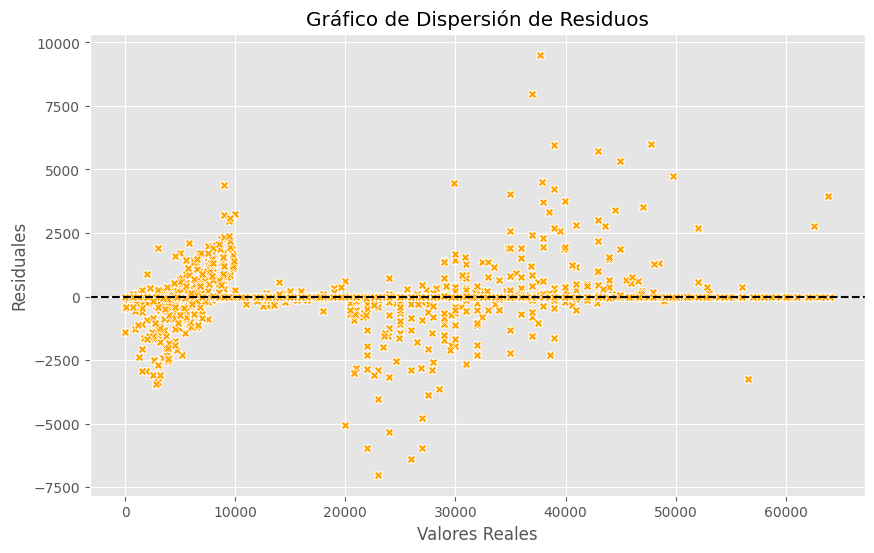

In [61]:
# Cargar los datos desde el archivo Excel
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission2.xlsx'
datos = pd.read_excel(ruta_archivo)

# Definir una función para asignar categoría de precio
def asignar_categoria_precio(price):
    if price < 10000:
        return 'Bajo'
    elif 10000 <= price < 20000:
        return 'Medio'
    else:
        return 'Alto'

# Seleccionar las columnas relevantes
columnas_seleccionadas = ['odometer', 'price', 'year', 'make']
datos_seleccionados = datos[columnas_seleccionadas]

# Identificar y eliminar datos atípicos en la columna 'price'
Q1 = datos_seleccionados['price'].quantile(0.25)
Q3 = datos_seleccionados['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar datos atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar filas sin valores atípicos en 'price'
datos_sin_atipicos = datos_seleccionados[(datos_seleccionados['price'] >= lower_bound) & (datos_seleccionados['price'] <= upper_bound)]

# Agregar la columna 'categoria_precio' al DataFrame
datos_sin_atipicos['categoria_precio'] = datos_sin_atipicos['price'].apply(asignar_categoria_precio)

# Convertir la columna 'price' a tipo numérico
datos_sin_atipicos['price'] = pd.to_numeric(datos_sin_atipicos['price'])

# Convertir todas las columnas a tipo de datos string
datos_sin_atipicos = datos_sin_atipicos.astype(str)

# Dividir los datos en características (X) y variable objetivo (y)
X = datos_sin_atipicos.drop('price', axis=1)
y = datos_sin_atipicos['price']

# Convertir variables categóricas a numéricas utilizando Label Encoding
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los parámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Inicializar el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Realizar la búsqueda de hiperparámetros
random_search.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Obtener el mejor modelo
best_model_random = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_random = best_model_random.predict(X_test_scaled)

# Convertir la columna 'price' a tipo numérico en y_test
y_test_numeric = pd.to_numeric(y_test)

# Calcular métricas con el mejor modelo
rmse_random = np.sqrt(mean_squared_error(y_test_numeric, y_pred_random))
r2_random = r2_score(y_test_numeric, y_pred_random)
mae_random = mean_absolute_error(y_test_numeric, y_pred_random)
mape_random = mean_squared_log_error(y_test_numeric, y_pred_random)

# Imprimir métricas con el mejor modelo
print("RMSE con RandomizedSearchCV:", rmse_random)
print("R2 con RandomizedSearchCV:", r2_random)
print("MAE con RandomizedSearchCV: %.3f" % mae_random)
print("MAPE con RandomizedSearchCV: %.3f" % mape_random)

# Visualizar métricas a lo largo de los epoch (Con RandomizedSearchCV)
num_epochs = len(random_search.cv_results_['mean_test_score'])
print("Epoch :", num_epochs)

# Calcular métricas adicionales
msle_random = mean_squared_log_error(y_test_numeric, y_pred_random)
explained_var_random = explained_variance_score(y_test_numeric, y_pred_random)


# Calcular residuos
residuals = y_test_numeric - y_pred_random

#scatterplot with palete pastel
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')
sns.scatterplot(x=y_test_numeric, y=residuals, marker='X', color='orange', palette='pastel')
plt.axhline(y=0, color='black', linestyle='--')  # Línea horizontal en y=0
plt.title('Gráfico de Dispersión de Residuos')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')
plt.show()


Se guardan los resultados calculados en los modelos previos en un archivo de formato .xlsx y se realiza el print en el notebook con la intencion de tener nuestro avance resguardado ante cualquier inconveniente que ocurriria.

In [26]:
# Crear un DataFrame con las métricas
metricas_dict = {
    'RMSE': [rmse_random],
    'R2': [r2_random],
    'MAE': [mae_random],
    'MAPE': [mape_random],
    'MSLE': [msle_random],
    'Explained Variance': [explained_var_random]
}

metricas_df = pd.DataFrame(metricas_dict)

# Guardar el DataFrame en un archivo Excel
ruta_resultados = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\resultados_modelo.xlsx'
metricas_df.to_excel(ruta_resultados, index=False)

# Imprimir la ruta del archivo guardado
print(f"Los resultados han sido guardados en: {ruta_resultados}")

# print dataframe resultados_modelo.xlsx
ruta_resultados = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\resultados_modelo.xlsx'
datos = pd.read_excel(ruta_resultados)
print(datos)


Los resultados han sido guardados en: C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\resultados_modelo.xlsx
         RMSE        R2         MAE      MAPE      MSLE  Explained Variance
0  815.722616  0.996887  279.775506  0.044807  0.044807            0.996887


In [24]:
# Save in xlsx price year
ruta_archivo = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\submission2.xlsx'
datos = pd.read_excel(ruta_archivo)
datos = datos.fillna("0")

# Convertir a float los valores que sean string
datos['price'] = pd.to_numeric(datos['price'], errors='coerce')
datos['year'] = pd.to_numeric(datos['year'], errors='coerce')

# Eliminar filas con valores faltantes
datos_sin_nan = datos.dropna()

# Eliminar duplicados
datos_sin_duplicados = datos_sin_nan.drop_duplicates()

# Agrupar por 'make' y calcular la media de 'price'
precio_por_marca = datos_sin_duplicados.groupby('year')['price'].mean()

# Verificar si hay valores no numericos o faltantes en 'price'
numbers = datos_sin_duplicados['price']
if np.any(np.isnan(numbers)):
    print("La columna 'price' contiene valores no numéricos o faltantes.")
else:
    # Calcular la media y la desviación estándar
    mean = np.mean(numbers)
    print("Media de precios:", mean)

# Exportar los resultados a un nuevo archivo
ruta_resultado2 = r'C:\Users\TakeshiMechanics\Desktop\Coderhouse\Data science\Proyecto\Dataset\cartruck\resultado2.xlsx'
precio_por_marca.to_excel(ruta_resultado2)
print(precio_por_marca)


Media de precios: 23208.978993919292
year
1932    49900.000000
1939    10900.000000
1949    59500.000000
1951    13000.000000
1953    11466.666667
            ...     
2019    39385.033493
2020    40555.515873
2021    52480.736111
2022    70921.862745
2023     1500.000000
Name: price, Length: 71, dtype: float64
